# Prudential Life Insurance 

# The Challenge
In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling us to significantly streamline the process.

# Variable	Description
- Id : 	A unique identifier associated with an application. <br>
- Product_Info_1-7 :	A set of normalized variables relating to the product applied for <br>
- Ins_Age : 	Normalized age of applicant.<br>
- Ht :	Normalized height of applicant.<br>
- Wt : 	Normalized weight of applicant.<br>
- BMI :	Normalized BMI of applicant.<br>
- Employment_Info_1-6 :	A set of normalized variables relating to the employment history of the applicant.<br>
- InsuredInfo_1-6	: A set of normalized variables providing information about the applicant.<br>
- Insurance_History_1-9 : A set of normalized variables relating to the insurance history of the applicant.<br>
- Family_Hist_1-5 :	A set of normalized variables relating to the family history of the applicant.<br>
- Medical_History_1-41 :	A set of normalized variables relating to the medical history of the applicant.<br>
- Medical_Keyword_1-48 :	A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.<br>
- Response : This is the target variable, an ordinal variable relating to the final decision associated with an application.<br>

# Division of data types

## The following variables are all categorical (nominal):

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41

## The following variables are continuous:

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

## The following variables are discrete:

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

Medical_Keyword_1-48 are dummy variables.

# Load Dataset

# Data Preprocessing

In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Load dataset from google drive
data_train = pd.read_csv('/content/gdrive/My Drive/train.csv')

In [0]:
data_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data_train.tail()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,0.020,1,3,0.00000,3,0.025,1,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.217391,NaN,0.197183,NaN,0.0,261,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,0.100,9,1,0.00001,2,0.350,1,2,3,3,1,1,1,2,1,3,2,0.000267,1,3,2,3,0.565217,NaN,0.478873,NaN,24.0,491,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,0.360969,0.035,9,1,0.00000,2,NaN,1,2,6,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.173913,NaN,0.126761,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,0.276151,0.462452,0.038,9,1,NaN,3,NaN,1,2,3,3,1,2,1,2,1,1,3,NaN,3,2,3,2,NaN,0.372549,0.704225,NaN,0.0,16,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
59380,79146,1,A8,26,0.076923,2,3,1,0.447761,0.781818,0.382845,0.539563,0.123,9,1,NaN,2,0.300,1,2,6,3,1,1,1,2,1,1,3,NaN,3,2,3,2,NaN,0.401961,NaN,0.589286,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data_train.shape

(59381, 128)

In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


# Types Dataset

In [0]:
# menampilkan column kategorik
for i in data_train.columns :
    col_type = data_train[i].dtype
    if col_type == object:
        print (i)

Product_Info_2


In [0]:
# menampilkan column numerik
for i in data_train.columns :
    col_type = data_train[i].dtype
    if col_type != object:
        print (i)

Id
Product_Info_1
Product_Info_3
Product_Info_4
Product_Info_5
Product_Info_6
Product_Info_7
Ins_Age
Ht
Wt
BMI
Employment_Info_1
Employment_Info_2
Employment_Info_3
Employment_Info_4
Employment_Info_5
Employment_Info_6
InsuredInfo_1
InsuredInfo_2
InsuredInfo_3
InsuredInfo_4
InsuredInfo_5
InsuredInfo_6
InsuredInfo_7
Insurance_History_1
Insurance_History_2
Insurance_History_3
Insurance_History_4
Insurance_History_5
Insurance_History_7
Insurance_History_8
Insurance_History_9
Family_Hist_1
Family_Hist_2
Family_Hist_3
Family_Hist_4
Family_Hist_5
Medical_History_1
Medical_History_2
Medical_History_3
Medical_History_4
Medical_History_5
Medical_History_6
Medical_History_7
Medical_History_8
Medical_History_9
Medical_History_10
Medical_History_11
Medical_History_12
Medical_History_13
Medical_History_14
Medical_History_15
Medical_History_16
Medical_History_17
Medical_History_18
Medical_History_19
Medical_History_20
Medical_History_21
Medical_History_22
Medical_History_23
Medical_History_24
Medica

# Missing Values

In [0]:
#Menampilkan 10 missing values tertinggi
data_missing = pd.DataFrame(data_train.isnull().sum() / len(data_train)).sort_values(by=0, ascending=False)
data_missing[:10]

,0
Medical_History_10,0.990620
Medical_History_32,0.981358
Medical_History_24,0.935990
Medical_History_15,0.751015
Family_Hist_5,0.704114
Family_Hist_3,0.576632
Family_Hist_2,0.482579
Insurance_History_5,0.427679
Family_Hist_4,0.323066
Employment_Info_6,0.182786


# Information Missing Values

- Continous Features <br>
Employment_Info_1_4_6, Insurance_History_5, Family_Hist_2-3-4-5

- Discreate Features <br>
Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

# Handling Missing Values <br>
- Remove columns with missing values more than 60%. <br>
- Impute missing values with mean and median or may be mode. <br>

## Remove columns with missing values more than 40%.

In [0]:
drop = data_missing[data_missing[0] > 0.4]
drop

,0
Medical_History_10,0.990620
Medical_History_32,0.981358
Medical_History_24,0.935990
Medical_History_15,0.751015
Family_Hist_5,0.704114
Family_Hist_3,0.576632
Family_Hist_2,0.482579
Insurance_History_5,0.427679


In [0]:
data_train.drop(columns=drop.index, inplace=True)
data_train.shape

(59381, 120)

In [0]:
data_missing = pd.DataFrame(data_train.isnull().sum() / len(data_train)).sort_values(by=0, ascending=False)
data_missing[:10]

,0
Family_Hist_4,0.323066
Employment_Info_6,0.182786
Medical_History_1,0.149694
Employment_Info_4,0.114161
Employment_Info_1,0.000320
Medical_Keyword_19,0.000000
Medical_Keyword_18,0.000000
Medical_Keyword_17,0.000000
Medical_Keyword_16,0.000000
Medical_Keyword_15,0.000000


## Impute missing values with Median and Mode

### Employment Info

In [0]:
data_train['Employment_Info_1'].fillna(data_train['Employment_Info_1'].median(),inplace=True)
data_train['Employment_Info_4'].fillna(data_train['Employment_Info_4'].median(),inplace=True)
data_train['Employment_Info_6'].fillna(data_train['Employment_Info_6'].median(),inplace=True)

### Medical History

In [0]:
data_train['Medical_History_1'].fillna(data_train['Medical_History_1'].median(),inplace=True)

### Family History

In [0]:
data_train['Family_Hist_4'].fillna(data_train['Family_Hist_4'].median(),inplace=True)

## Checking Missing Values

In [0]:
data_missing = pd.DataFrame(data_train.isnull().sum() / len(data_train)).sort_values(by=0, ascending=False)
data_missing[:10]

,0
Id,0.0
Product_Info_1,0.0
Medical_Keyword_18,0.0
Medical_Keyword_17,0.0
Medical_Keyword_16,0.0
Medical_Keyword_15,0.0
Medical_Keyword_14,0.0
Medical_Keyword_13,0.0
Medical_Keyword_12,0.0
Medical_Keyword_11,0.0


# Data Visualization

In [0]:
data_train.Response.value_counts() 

0    44181
1    15200
Name: Response, dtype: int64

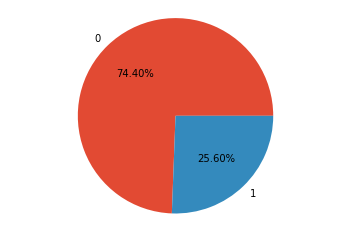

In [0]:
# label yang akan dibuat
import matplotlib.pyplot as plt

plt.pie(data_train['Response'].value_counts(),labels=data_train['Response'].unique(), autopct='%.2f%%')
plt.axis('equal')
plt.show()

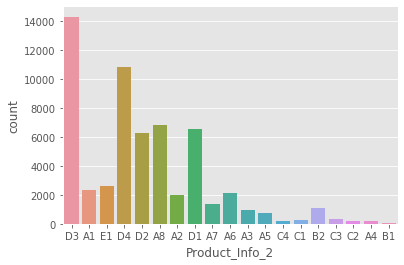

In [0]:
import seaborn as sns

sns.countplot(data_train['Product_Info_2'])

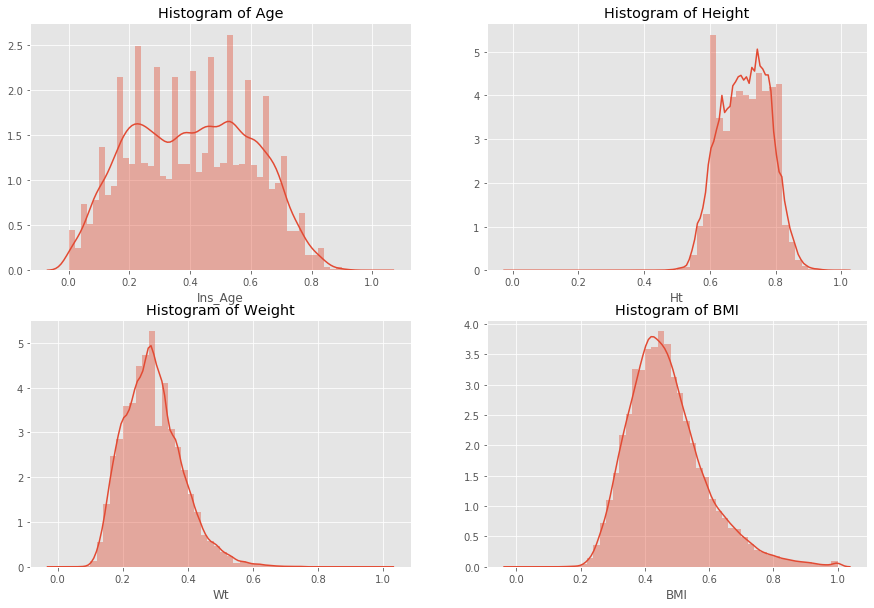

In [0]:
f=plt.figure(figsize=(15,10))

f.add_subplot(2,2,1)
plt.style.use('ggplot')
sns.distplot(data_train['Ins_Age'])
plt.title('Histogram of Age')

#plt.show()
f.add_subplot(2,2,2)
sns.distplot(data_train['Ht'])
plt.title('Histogram of Height')

f.add_subplot(2,2,3)
sns.distplot(data_train['Wt'])
plt.title('Histogram of Weight')

f.add_subplot(2,2,4)
sns.distplot(data_train['BMI'])
plt.title('Histogram of BMI')

plt.show()

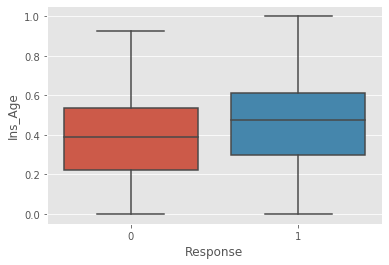

In [0]:
sns.boxplot(y=data_train['Ins_Age'],x=data_train['Response'])

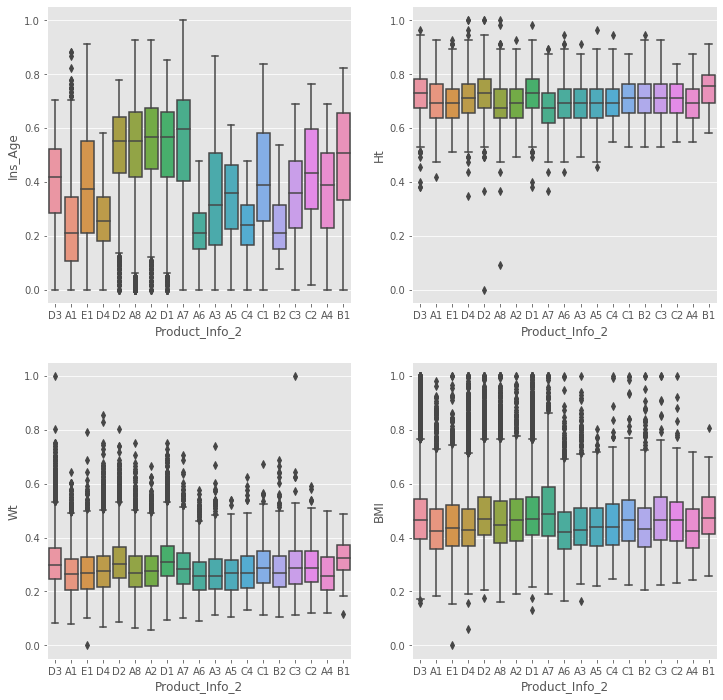

In [0]:
f=plt.figure(figsize=(12,12))
f.add_subplot(2,2,1)
sns.boxplot(y=data_train['Ins_Age'],x=data_train['Product_Info_2'])

f.add_subplot(2,2,2)
sns.boxplot(y=data_train['Ht'],x=data_train['Product_Info_2'])

f.add_subplot(2,2,3)
sns.boxplot(y=data_train['Wt'],x=data_train['Product_Info_2'])

f.add_subplot(2,2,4)
sns.boxplot(y=data_train['BMI'],x=data_train['Product_Info_2'])
plt.show()

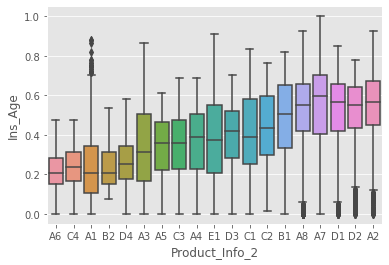

In [0]:
visual = data_train[['Product_Info_2', 'Ins_Age']].groupby('Product_Info_2').mean().sort_values('Ins_Age')
sns.boxplot(y=data_train['Ins_Age'],x=data_train['Product_Info_2'], order=visual.index)

In [0]:
data_train_highrisk = data_train[data_train['Response']==1]
data_train_lowrisk = data_train[data_train['Response']==0]

In [0]:
data_train_highrisk.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,0.084507,5.0,412,2,1,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,14,1,D2,26,0.076923,2,3,1,0.611940,0.781818,0.403766,0.571612,0.120,12,1,0.0,2,1.0000,1,2,6,3,1,1,1,1,1,3,1,1,1,2,2,0.422535,6.0,145,2,2,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,16,1,E1,21,0.076923,2,3,1,0.552239,0.600000,0.284519,0.587796,0.025,1,3,0.0,3,0.0500,2,2,3,3,1,2,1,2,1,3,1,1,3,2,3,0.422535,4.0,162,2,2,1,3,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,18,1,D4,26,0.230769,2,3,1,0.298507,0.690909,0.271967,0.455050,0.090,3,1,0.0,2,1.0000,1,2,3,3,1,1,1,2,1,1,3,3,2,3,2,0.352113,4.0,434,2,1,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13,20,2,D1,26,0.487179,2,3,1,0.223881,0.781818,0.361925,0.507515,0.100,9,1,0.0,2,0.0750,1,2,3,3,3,1,1,2,1,1,3,3,2,3,3,0.338028,4.0,162,2,1,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


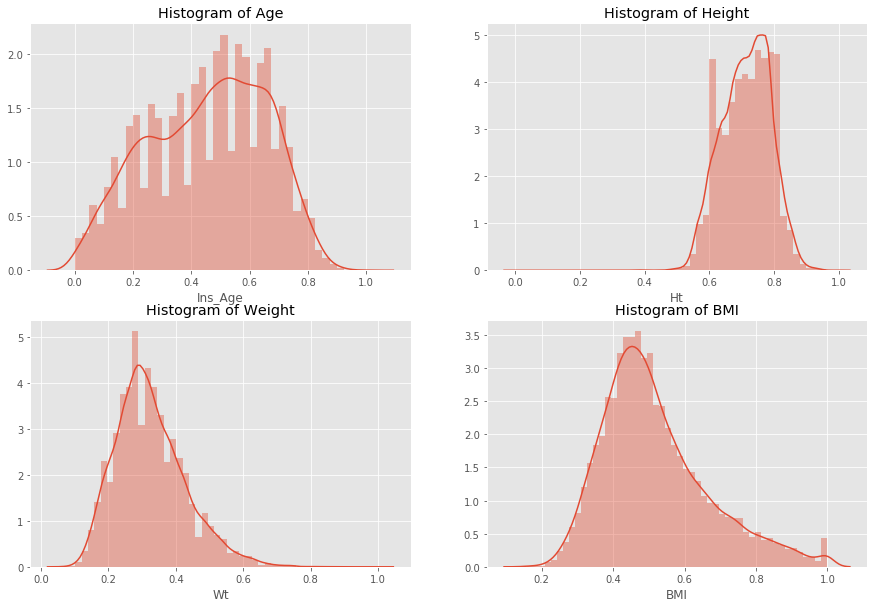

In [0]:
f=plt.figure(figsize=(15,10))

f.add_subplot(2,2,1)
plt.style.use('ggplot')
sns.distplot(data_train_highrisk['Ins_Age'])
plt.title('Histogram of Age')

#plt.show()
f.add_subplot(2,2,2)
sns.distplot(data_train_highrisk['Ht'])
plt.title('Histogram of Height')

f.add_subplot(2,2,3)
sns.distplot(data_train_highrisk['Wt'])
plt.title('Histogram of Weight')

f.add_subplot(2,2,4)
sns.distplot(data_train_highrisk['BMI'])
plt.title('Histogram of BMI')

plt.show()

In [0]:
data_train_lowrisk.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.25,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,0.422535,4.0,112,2,1,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.03,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,0.225352,10.0,3,2,2,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.20,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,0.352113,0.0,350,2,2,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.05,1,2,6,3,1,2,1,2,1,1,3,3,2,3,2,0.408451,4.0,162,2,2,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,10,1,D2,26,0.230769,3,1,1,0.507463,0.836364,0.299163,0.364887,0.325,15,1,0.0,2,1.00,1,2,8,3,1,1,1,2,1,3,2,1,3,2,2,0.507042,6.0,491,2,2,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


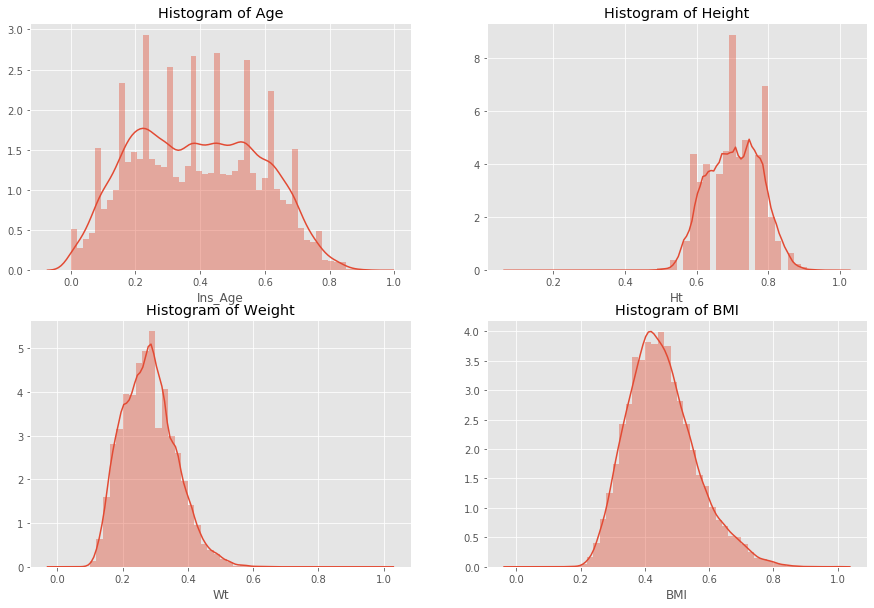

In [0]:
f=plt.figure(figsize=(15,10))

f.add_subplot(2,2,1)
plt.style.use('ggplot')
sns.distplot(data_train_lowrisk['Ins_Age'])
plt.title('Histogram of Age')

#plt.show()
f.add_subplot(2,2,2)
sns.distplot(data_train_lowrisk['Ht'])
plt.title('Histogram of Height')

f.add_subplot(2,2,3)
sns.distplot(data_train_lowrisk['Wt'])
plt.title('Histogram of Weight')

f.add_subplot(2,2,4)
sns.distplot(data_train_lowrisk['BMI'])
plt.title('Histogram of BMI')

plt.show()

# Dummies Categorical Variable

In [0]:
data_train = pd.get_dummies(data_train, drop_first=True)

In [0]:
corr = data_train.corr()
corr

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,...,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
Id,1.000000,-0.002870,-0.001869,-0.002914,-0.004195,0.005038,0.002117,0.001764,0.003674,0.005648,0.004287,0.004887,0.003494,-0.001986,-0.001719,-0.001187,-0.002478,-0.000660,-0.000933,-0.005334,-0.002146,-0.007252,-0.002743,-0.000444,-0.006076,-0.003174,-0.002030,0.001276,0.002302,-0.008474,0.002351,-0.002500,0.002776,-0.001043,0.004283,-0.002067,-0.005608,-0.003288,0.000827,-0.001361,...,-0.007184,-0.000063,-0.005972,0.004306,0.005827,0.002889,-0.001369,-0.005707,-0.000728,0.000900,-0.002561,0.006539,-0.001746,0.005721,-0.004575,-0.007633,0.001917,-0.000286,0.002684,0.001199,-0.001122,-0.001596,0.004219,0.000522,-0.005922,-0.002550,0.000607,0.002860,0.000459,0.002003,0.000164,-0.001426,0.000232,-0.009268,-0.004578,-0.007424,0.001273,0.001423,0.007017,-0.006821
Product_Info_1,-0.002870,1.000000,0.027573,0.059829,0.069720,-0.078684,0.012169,-0.077429,0.052720,-0.004035,-0.037130,0.047382,0.032271,-0.039832,0.006482,-0.018840,0.013243,-0.041654,0.002911,0.002709,-0.047523,0.013376,-0.047975,0.011357,0.013058,0.007242,-0.008187,0.015076,0.006753,0.012547,0.008191,-0.001294,-0.046828,0.016873,0.005200,-0.017654,-0.022528,0.005489,0.008830,-0.000740,...,-0.004660,-0.008189,-0.008202,-0.008154,0.002827,-0.006149,0.001988,-0.003620,-0.004441,0.007081,-0.007272,0.002378,-0.002782,0.004495,-0.007697,-0.014055,-0.008247,-0.006719,-0.010638,0.004402,-0.008469,-0.016766,-0.015848,0.001860,0.000824,-0.008731,-0.006431,-0.015648,-0.021786,-0.004964,0.010369,-0.002299,-0.000440,-0.004500,0.005599,0.004116,-0.013213,0.009723,0.023441,0.000630
Product_Info_3,-0.001869,0.027573,1.000000,0.048775,0.025419,-0.018855,0.015581,0.001005,0.293546,0.213546,0.083288,0.151419,0.191771,-0.241939,-0.026998,-0.764707,0.006048,-0.033652,0.019398,-0.004991,-0.056197,0.026939,-0.398228,0.029694,0.009949,0.010795,0.033448,-0.022591,-0.038518,0.038793,-0.032734,0.020843,-0.001725,0.005485,-0.033661,-0.041289,-0.090907,-0.004510,-0.045986,-0.005644,...,-0.006696,-0.032222,-0.073598,0.008732,-0.016893,0.007742,-0.015632,0.004309,0.013350,-0.011072,0.028331,-0.046710,-0.039359,-0.000005,-0.036560,0.034787,0.002696,-0.053305,-0.001538,-0.017001,0.045862,0.043299,-0.011546,0.001563,0.009155,0.000464,-0.007265,-0.018640,-0.026847,0.008652,-0.002935,0.000794,-0.003042,-0.006732,-0.003999,0.039758,0.013393,0.005024,-0.018616,-0.005602
Product_Info_4,-0.002914,0.059829,0.048775,1.000000,0.040433,-0.089075,0.051542,-0.261356,0.141780,-0.028041,-0.129369,0.350921,0.140759,-0.178712,0.041446,-0.077297,0.235578,0.060936,-0.007285,-0.016754,-0.073148,-0.006923,-0.138304,-0.022624,0.049299,0.001138,-0.008779,0.026183,-0.015907,0.054368,0.013226,0.032182,

In [0]:
import numpy as np

In [0]:
corr_matrix = data_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

to_drop

['BMI',
 'Insurance_History_4',
 'Insurance_History_7',
 'Insurance_History_9',
 'Medical_History_26',
 'Medical_History_36',
 'Medical_Keyword_11',
 'Medical_Keyword_15',
 'Medical_Keyword_23',
 'Medical_Keyword_30',
 'Medical_Keyword_48']

In [0]:
data_train = data_train.drop(data_train[to_drop], axis=1)

# Data_Train

In [0]:
data_train.head()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_8,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,...,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Response,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,2,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,3,2,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,2,3,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,2,3,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,2,2,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
target = data_train['Response']

In [0]:
target = pd.DataFrame(target)

In [0]:
data_train = data_train.drop('Response', axis=1)

In [0]:
data_train = pd.concat([data_train, target],1)

In [0]:
data_train.head()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_8,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,...,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1,Response
0,2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,2,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,3,2,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,2,3,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,2,3,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,2,2,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Modelling

In [0]:
X_train=data_train.iloc[:,0:-1]
y_train=data_train['Response']
X_train.drop('Id',axis=1,inplace=True)

In [0]:
X_train.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_8,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,...,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.028,12,1,0.0,3,0.2500,1,2,6,3,1,2,1,1,1,3,1,2,0.422535,4.0,112,2,1,1,3,2,2,1,3,2,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,3,2,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,2,3,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,2,3,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,2,2,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
## collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
            KNeighborsClassifier,
            GaussianNB,
            RandomForestClassifier,
            ExtraTreesClassifier]
all_model

[sklearn.tree.tree.DecisionTreeClassifier,
 sklearn.linear_model.logistic.LogisticRegression,
 sklearn.neighbors.classification.KNeighborsClassifier,
 sklearn.naive_bayes.GaussianNB,
 sklearn.ensemble.forest.RandomForestClassifier,
 sklearn.ensemble.forest.ExtraTreesClassifier]

In [0]:
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss

In [0]:
datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]
for i in all_model:
    model = i()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    datatr.append(model.score( X_train , y_train ))
    datasc.append(model.score( X_test , y_test ))
    Recall.append(recall_score(y_test,y_pred))
    Precision.append(precision_score(y_test,y_pred))
    auc.append(roc_auc_score(y_test,y_pred))
   # print(i, model.score( X_train , y_train ) , model.score( X_test , y_test )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
data1 = pd.DataFrame()
data1['model'] = all_model
data1['Accuracy training'] = datatr
data1['Accuracy test'] = datasc
data1['Precision'] = Precision
data1['Recall']= Recall
data1['AUC']=auc
data1['gap'] = abs(data1['Accuracy training'] - data1['Accuracy test'])
data1.sort_values(by='Accuracy test',ascending=False)


,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
1,<class 'sklearn.linear_model.logistic.Logistic...,0.791491,0.797171,0.685484,0.367476,0.655158,0.005680
5,<class 'sklearn.ensemble.forest.ExtraTreesClas...,1.000000,0.785047,0.647021,0.332225,0.635391,0.214953
4,<class 'sklearn.ensemble.forest.RandomForestCl...,0.981980,0.782184,0.643443,0.313269,0.627209,0.199796
2,<class 'sklearn.neighbors.classification.KNeig...,0.796670,0.744296,0.485294,0.164616,0.552714,0.052374
3,<class 'sklearn.naive_bayes.GaussianNB'>,0.725939,0.735371,0.479530,0.529764,0.667419,0.009432
0,<class 'sklearn.tree.tree.DecisionTreeClassifi...,1.000000,0.718026,0.445783,0.467576,0.635253,0.281974


In [0]:
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      8870
           1       0.65      0.33      0.44      3007

    accuracy                           0.79     11877
   macro avg       0.73      0.64      0.65     11877
weighted avg       0.77      0.79      0.76     11877



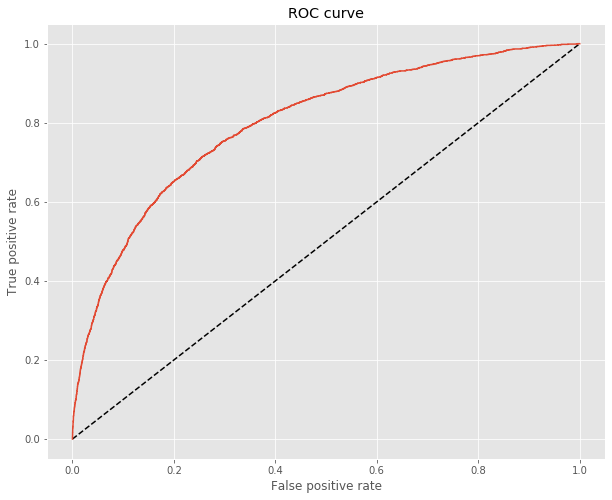

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

def plot_roc_curve(ytest, P_ensemble):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')

    fpr, tpr, _ = roc_curve(y_test, P_ensemble)
    plt.plot(fpr, tpr)
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.show()

print(classification_report(y_test,y_pred))
y_pred_proba=model.predict_proba(X_test)
plot_roc_curve(y_test,y_pred_proba[:,1])

In [0]:
data_train.shape

(59381, 126)

In [0]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[8325  545]
 [2008  999]]
Accuracy :  0.7850467289719626
Sensitivity :  0.9385569334836528
Specificity :  0.3322248087795145


In [0]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model, '/content/gdrive/My Drive/model1.pkl') 

['/content/gdrive/My Drive/model1.pkl']

In [0]:
data_test = pd.read_csv('/content/gdrive/My Drive/test.csv')

In [0]:
data_test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,0.338912,0.472262,0.150,3,1,0.00,2,0.50,2,2,11,3,1,1,1,2,1,1,3,NaN,3,2,3,3,NaN,0.627451,0.760563,NaN,2.0,16,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,0.311715,0.484984,0.000,1,3,0.07,2,0.20,1,2,8,3,1,1,1,1,1,3,1,0.001667,1,1,2,2,NaN,0.529412,0.746479,NaN,5.0,261,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,0.320084,0.519103,0.143,9,1,0.00,2,0.45,1,2,3,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.666667,NaN,0.661972,NaN,3.0,132,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,0.267782,0.486962,0.210,9,1,0.00,2,1.00,2,2,3,3,1,1,1,1,1,3,1,0.000667,2,1,2,2,NaN,0.686275,0.676056,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,0.246862,0.428718,0.085,9,1,0.00,2,0.20,1,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.449275,NaN,0.380282,NaN,18.0,181,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data_test.shape

(19765, 127)

In [0]:
#Menampilkan 10 missing values tertinggi
data_missing = pd.DataFrame(data_test.isnull().sum() / len(data_test)).sort_values(by=0, ascending=False)
data_missing[:10]

,0
Medical_History_10,0.989831
Medical_History_32,0.982241
Medical_History_24,0.940299
Medical_History_15,0.752036
Family_Hist_5,0.689299
Family_Hist_3,0.559777
Family_Hist_2,0.499874
Insurance_History_5,0.410068
Family_Hist_4,0.337819
Employment_Info_6,0.191601


In [0]:
drop = data_missing[data_missing[0] > 0.4]
drop

,0
Medical_History_10,0.989831
Medical_History_32,0.982241
Medical_History_24,0.940299
Medical_History_15,0.752036
Family_Hist_5,0.689299
Family_Hist_3,0.559777
Family_Hist_2,0.499874
Insurance_History_5,0.410068


In [0]:
data_test.drop(columns=drop.index, inplace=True)
data_test.shape

(19765, 119)

In [0]:
data_missing = pd.DataFrame(data_test.isnull().sum() / len(data_test)).sort_values(by=0, ascending=False)
data_missing[:10]

,0
Family_Hist_4,0.337819
Employment_Info_6,0.191601
Medical_History_1,0.150367
Employment_Info_4,0.108120
Employment_Info_1,0.000152
Medical_Keyword_18,0.000000
Medical_Keyword_17,0.000000
Medical_Keyword_16,0.000000
Medical_Keyword_15,0.000000
Medical_Keyword_14,0.000000


In [0]:
data_test['Employment_Info_1'].fillna(data_test['Employment_Info_1'].median(),inplace=True)
data_test['Employment_Info_4'].fillna(data_test['Employment_Info_4'].median(),inplace=True)
data_test['Employment_Info_6'].fillna(data_test['Employment_Info_6'].median(),inplace=True)
data_test['Medical_History_1'].fillna(data_test['Medical_History_1'].median(),inplace=True)
data_test['Family_Hist_4'].fillna(data_test['Family_Hist_4'].median(),inplace=True)

In [0]:
data_missing = pd.DataFrame(data_test.isnull().sum() / len(data_test)).sort_values(by=0, ascending=False)
data_missing[:10]

,0
Id,0.0
Medical_Keyword_5,0.0
Medical_Keyword_17,0.0
Medical_Keyword_16,0.0
Medical_Keyword_15,0.0
Medical_Keyword_14,0.0
Medical_Keyword_13,0.0
Medical_Keyword_12,0.0
Medical_Keyword_11,0.0
Medical_Keyword_10,0.0


In [0]:
data_test = pd.get_dummies(data_test, drop_first=True)

In [0]:
corr_matrix = data_test.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

to_drop

['BMI',
 'Insurance_History_4',
 'Insurance_History_7',
 'Insurance_History_9',
 'Medical_History_26',
 'Medical_History_36',
 'Medical_Keyword_11',
 'Medical_Keyword_15',
 'Medical_Keyword_23',
 'Medical_Keyword_30',
 'Medical_Keyword_48']

In [0]:
data_test = data_test.drop(data_test[to_drop], axis=1)

In [0]:
data_test.shape

(19765, 125)

In [0]:
data_test.head()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_8,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,...,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,1,1,26,0.487179,2,3,1,0.611940,0.781818,0.338912,0.150,3,1,0.00,2,0.50,2,2,11,3,1,1,1,2,1,1,2,3,0.760563,2.0,16,2,2,1,3,1,2,2,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,1,26,0.076923,2,3,1,0.626866,0.727273,0.311715,0.000,1,3,0.07,2,0.20,1,2,8,3,1,1,1,1,1,3,1,2,0.746479,5.0,261,3,1,1,3,2,2,1,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1,26,0.144667,2,3,1,0.582090,0.709091,0.320084,0.143,9,1,0.00,2,0.45,1,2,3,3,1,1,1,2,1,1,2,3,0.661972,3.0,132,2,1,1,3,2,2,2,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,9,1,26,0.151709,2,1,1,0.522388,0.654545,0.267782,0.210,9,1,0.00,2,1.00,2,2,3,3,1,1,1,1,1,3,1,2,0.676056,4.0,162,3,2,1,1,2,3,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12,1,26,0.076923,2,3,1,0.298507,0.672727,0.246862,0.085,9,1,0.00,2,0.20,1,2,8,3,1,2,1,2,1,1,2,2,0.380282,18.0,181,3,1,1,3,2,2,2,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data_test = data_test.drop('Id',1)

In [0]:
# Load the model from the file 
model_from_joblib = joblib.load('/content/gdrive/My Drive/model1.pkl')  
  
# Use the loaded model to make predictions 
predictions = model_from_joblib.predict(data_test) 
predictions = pd.DataFrame(predictions)

In [0]:
predictions

,0
0,1
1,0
2,0
3,0
4,0
...,...
19760,0
19761,0
19762,1
19763,0


In [0]:
data_train.columns

Index(['Id', 'Product_Info_1', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Product_Info_2_C1', 'Product_Info_2_C2', 'Product_Info_2_C3',
       'Product_Info_2_C4', 'Product_Info_2_D1', 'Product_Info_2_D2',
       'Product_Info_2_D3', 'Product_Info_2_D4', 'Product_Info_2_E1',
       'Response'],
      dtype='object', length=126)